# Code used to create Figure 5

In [1]:
library(data.table)
library(ggplot2)
library(RColorBrewer)
library(ggsci)
library(magrittr) 

## Figure 5a


EUR EAS 
707 707 


     BLOOD     BREAST FIBROBLAST         GI      LIVER       LUNG     NEURAL 
       246         55         35         74         41         37         34 
    Others   STEMCELL 
       120         86 

[1] 7.072136e-05


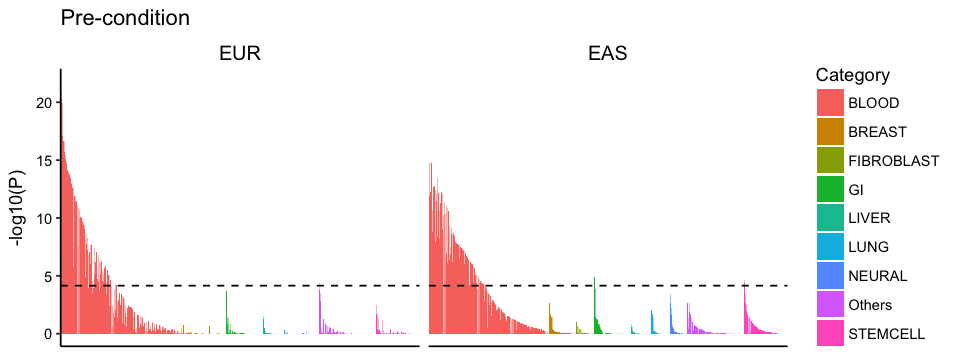

In [9]:
df <- data.frame()

#EUR S-LDSC results
d1<-read.table("../data/ra_meta_eur_trial01.impact_top5p_sldsc_Jan2021.txt",
               header=T,stringsAsFactors = F)
d1$P <- pnorm(- d1$Coefficient_z.score)
d1 <- d1[order(d1$P),]
keepids <- as.character(d1$ID)
out <- data.frame(ID=d1$ID,P=d1$P,pop="EUR")
df <- rbind(df,out)

#EAS S-LDSC results
d1<-read.table("../data/ra_meta_eas_trial01_nomal.impact_top5p_sldsc.txt",
               header=T,stringsAsFactors = F)
d1$P <- pnorm(- d1$Coefficient_z.score)
out <-data.frame(ID=d1$ID,P=d1$P,pop="EAS")
df <- rbind(df,out)

df <- df[df$ID %in% keepids, ]

table(df$pop)

#add label
d3 <- read.table("../data/TF_cell_type_pairs_Kawa.txt",header=F,
                 stringsAsFactors = F)[,1]
d3 <- data.frame(ID=as.character(1:length(d3)),name=d3)
d3$tissue <- sapply(as.character(d3$name),function(x){
    x <- strsplit(x,":");
    x <- unlist(x);
    return(x[2])
})

table(d3$tissue) -> TB
names(TB[TB>30]) -> keeptissue
d3$Category <- sapply(as.character(d3$tissue),function(x){
    if(x %in% keeptissue){ return(x) }else{ return('Others') }
})
table(d3$Category)
df2 <- merge(df,d3,by="ID")

#bonferroni threshold
pth = 0.05/length(keepids) 
show(pth)

df2$logp <- -log10(df2$P)
MAX <- max(df2$logp) + 1

#set orders
x <- df2[,c("ID","P","Category")]
x <- x[order(x$Category,x$P),]
x <- x[!duplicated(x$ID),]

df2$ID <- factor(df2$ID, levels=as.character(x$ID))
df2$pop <- factor(df2$pop, levels=c("EUR","EAS"))

#plot
options(repr.plot.width=8, repr.plot.height=3)

df2 %>% 
    ggplot(aes(x=ID, y= logp, fill=Category)) + 
    geom_bar(stat="identity") +
    theme_bw() +
    facet_wrap(~pop,nrow=1) +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.text.y=element_text(colour="black"),
        axis.ticks.x=element_blank()) +
    theme(axis.line = element_line(colour = "black"), 
        panel.background = element_blank(),
        panel.border = element_blank(), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()) +
    geom_hline(yintercept = -log10(pth), color="black", linetype="dashed") +
    scale_y_continuous(limits=c(0,MAX)) +
    labs(x="",y="-log10(P)",title="Pre-condition") +
    theme(strip.background = element_blank() ) +
    theme(strip.text = element_text( size = 12, color = "black"))



## Figure 5b


Both  EUR  EAS None 
  85    7   22  593 

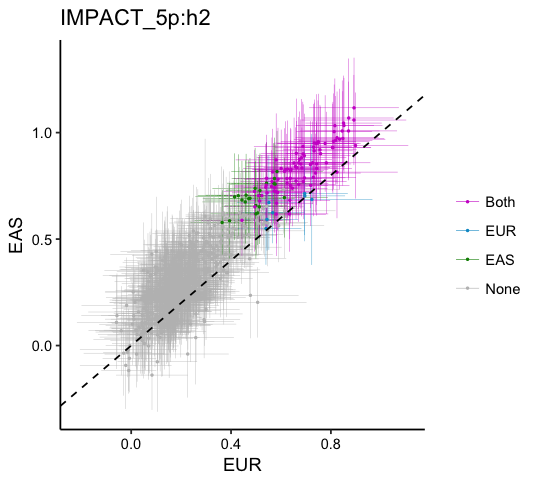

In [8]:
#EUR S-LDSC results
d1<-read.table("../data/ra_meta_eur_trial01.impact_top5p_sldsc_Jan2021.txt",
               header=T,stringsAsFactors = F)
d1$P <- pnorm(- d1$Coefficient_z.score)
d1$Padj <- d1$P * 707

#EAS S-LDSC results
d2<-read.table("../data/ra_meta_eas_trial01_nomal.impact_top5p_sldsc.txt",
               header=T,stringsAsFactors = F)
d2$P <- pnorm(- d2$Coefficient_z.score)
d2$Padj <- d2$P * 707

#label
d3 <- read.table("../data/TF_cell_type_pairs_Kawa.txt",
                 header=F,stringsAsFactors = F)[,1]
d3 <- data.frame(ID=as.character(1:length(d3)),name=d3)

#merge all
df <- merge(d1,d2,by="ID")
df <- merge(df,d3,by="ID")

 #head(df[order(df$Prop._h2.x,decreasing = T),])

#plot
df$siginfo <- apply(df[,c("Padj.x","Padj.y")],1,function(x){
  eur <- x[1];
  eas <- x[2];
  if( eur < 0.05 & eas < 0.05){"Both"
  }else if  ( eur < 0.05 & eas >= 0.05){"EUR"
  }else if  ( eur >= 0.05 & eas < 0.05){"EAS"
  }else{"None"}
})

df$siginfo <- factor(df$siginfo,levels=c("Both","EUR","EAS","None"))
df <- df[order(df$siginfo,decreasing = T),]

options(repr.plot.width=4.5, repr.plot.height=4)

p<- ggplot(df,aes(x=Prop._h2.x, y=Prop._h2.y, color=siginfo)) + 
    geom_errorbarh(aes(xmin= Prop._h2.x - 2*Prop._h2_std_error.x, 
                     xmax= Prop._h2.x + 2*Prop._h2_std_error.x ), size=0.1) +
    geom_errorbar(aes(ymin= Prop._h2.y - 2*Prop._h2_std_error.y, 
                    ymax= Prop._h2.y + 2*Prop._h2_std_error.y), size=0.1) +
    geom_point(size=0.3) +
    theme_bw() +
    geom_abline(slope=1,intercept=0,col="black",linetype="dashed") +
    labs(x="EUR",y="EAS",title="IMPACT_5p:h2") +
    scale_color_manual(values=c("magenta3","deepskyblue3","green4","grey"),
                     name="") +
    theme( axis.line = element_line(colour = "black"),
           axis.text=element_text(colour="black") ) +
    theme( panel.grid.major = element_blank(), 
           panel.grid.minor = element_blank() ) +
    theme( panel.border = element_blank(), 
           panel.background = element_blank() ) 

plot(p)

table(df$siginfo)